# Matrix Multiplication from scratch

Using:
* Python standard codes
* Pytorch - Broadcasting (also present in Numpy, but not using Numpy for this course)



In [ ]:
%matplotlib inline

In [ ]:
#export
import operator

def test(a, b, cmp, cname=None):
  if cname is None: cname = cmp.__name__
  assert cmp(a, b), f"{cname}:\n{a}\n{b}"

def test_eq(a, b): test(a, b, operator.eq, "==")

In [ ]:
#export
from fastai import datasets
import pickle, gzip
import matplotlib as mpl
from matplotlib import pyplot as plt
from torch import tensor
import torch

MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'

In [ ]:
path = datasets.download_data(MNIST_URL, ext = '.gz');path

PosixPath('/root/.fastai/data/mnist.pkl.gz?raw=true.gz')

In [ ]:
with gzip.open(path, 'rb') as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding = 'latin-1')

In [ ]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [ ]:
x_train.shape

torch.Size([50000, 784])

In [ ]:
mpl.rcParams['image.cmap'] = 'gray'

In [ ]:
img = x_train[0]

In [ ]:
img.view(28, 28).type()

'torch.FloatTensor'

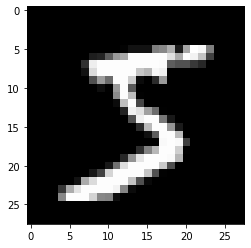

In [ ]:
plt.imshow(img.view(28, 28))

## Initial Model

In [ ]:
weights = torch.randn(784, 10)

In [ ]:
bias = torch.zeros(10)

### Matmul 

In [ ]:
def matmul(a,b):
  ar, ac = a.shape
  br, bc = b.shape
  c = torch.zeros(ar, bc)
  for i in range(0, ar):
    for j in range(0, bc):
      for k in range(0, ac):
        c[i,j] += (a[i, k] * b[k, j])
  
  return(c)

In [ ]:
m1 = x_valid[:5]
m2 = weights

In [ ]:
print(m1.shape)
m2.shape

torch.Size([5, 784])


torch.Size([784, 10])

In [ ]:
%time matmul(m1, m2)

CPU times: user 1.02 s, sys: 0 ns, total: 1.02 s
Wall time: 1.05 s


tensor([[ 12.7990,  -7.5170,  -3.7568,  -7.7135,   3.1841,  -4.3399,  -1.7537,
           1.3450, -20.3629,  -0.4946],
        [  1.0058,  -0.5439,   3.5374,  -4.7036,   9.2323, -12.4245,  -2.9135,
           2.3388, -18.2845,  -2.1528],
        [ -1.3756,   5.1739,  -2.1492,  -1.5618,  -1.9778, -10.1309,  -7.2447,
          -0.4815,   2.5953,   4.3499],
        [  3.7618,   7.3746,   2.5350,   1.6643,  -4.0987,  -4.3802,   6.5849,
          -1.5285,  -9.3501,  -5.5549],
        [-15.2386,   7.6691,   3.9381,   4.6943,   6.1034,  -8.5154, -21.9994,
           0.8468,  -7.3573,   0.0375]])

In [ ]:
def matmul_el(a,b):
  ar, ac = a.shape
  br, bc = b.shape
  c = torch.zeros(ar, bc)
  for i in range(0, ar):
    for j in range(0, bc):
        c[i,j] += (a[i] * b[ :, j]).sum()
  
  return(c)

In [ ]:
%time matmul_el(m1, m2)

CPU times: user 3.83 ms, sys: 1.15 ms, total: 4.98 ms
Wall time: 5.02 ms


tensor([[ 12.7990,  -7.5170,  -3.7568,  -7.7135,   3.1841,  -4.3399,  -1.7537,
           1.3450, -20.3629,  -0.4946],
        [  1.0058,  -0.5439,   3.5374,  -4.7036,   9.2323, -12.4245,  -2.9135,
           2.3388, -18.2845,  -2.1528],
        [ -1.3756,   5.1739,  -2.1492,  -1.5618,  -1.9778, -10.1309,  -7.2447,
          -0.4815,   2.5953,   4.3499],
        [  3.7618,   7.3746,   2.5350,   1.6643,  -4.0987,  -4.3802,   6.5849,
          -1.5285,  -9.3501,  -5.5549],
        [-15.2386,   7.6691,   3.9381,   4.6943,   6.1034,  -8.5154, -21.9994,
           0.8468,  -7.3573,   0.0375]])

In [ ]:
def matmul_br(a,b):
  ar, ac = a.shape
  br, bc = b.shape
  c = torch.zeros(ar, bc)
  for i in range(0, ar):
        c[i] = (a[i, :, None] * b).sum(dim = 0)
  
  return(c)

In [ ]:
%time matmul_br(m1, m2)

CPU times: user 807 µs, sys: 0 ns, total: 807 µs
Wall time: 841 µs


tensor([[ 12.7990,  -7.5170,  -3.7568,  -7.7135,   3.1841,  -4.3399,  -1.7537,
           1.3450, -20.3629,  -0.4946],
        [  1.0058,  -0.5439,   3.5374,  -4.7036,   9.2323, -12.4245,  -2.9135,
           2.3388, -18.2845,  -2.1528],
        [ -1.3756,   5.1739,  -2.1492,  -1.5618,  -1.9778, -10.1309,  -7.2447,
          -0.4815,   2.5953,   4.3499],
        [  3.7618,   7.3746,   2.5350,   1.6643,  -4.0987,  -4.3802,   6.5849,
          -1.5285,  -9.3501,  -5.5549],
        [-15.2386,   7.6691,   3.9381,   4.6943,   6.1034,  -8.5154, -21.9994,
           0.8468,  -7.3573,   0.0375]])

In [ ]:
#export
def near(a,b): return(torch.allclose(a,b,rtol=1e-05))
def test_near(a,b): assert(near(a,b))

In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [4]:
!pip install fire

     |████████████████████████████████| 92kB 3.7MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=3b22b170595c3ebad42a330e708642a1a3365cf448d979d52e2b25ca0a95a981
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
Successfully built fire


In [10]:
!python /content/drive/MyDrive/git/fast-ai-part2/notebook_to_script.py /content/drive/MyDrive/git/fast-ai-part2/01_matmul_broadcast.ipynb

Converted /content/drive/MyDrive/git/fast-ai-part2/01_matmul_broadcast.ipynb to /content/drive/MyDrive/git/fast-ai-part2/exp/nb_01.py
